## Lending Club Case Study

#### Import all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the required data

In [2]:
df = pd.read_csv('loan.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
column_list = df.columns.tolist()
column_list

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
for column in df.columns:
    print("Column:", column)
    print("Data Type:", df[column].dtype)
    print("Number of Non-null Values:", df[column].count())
    print("Number of Unique Values:", df[column].nunique())
    print("")

    # Additional information specific to numerical columns
    if df[column].dtype in ['int64', 'float64']:
        print("Minimum Value:", df[column].min())
        print("Maximum Value:", df[column].max())
        print("Mean:", df[column].mean())
        print("Median:", df[column].median())
        print("Standard Deviation:", df[column].std())
        print("")

    # Additional information specific to categorical columns
    elif df[column].dtype == 'object':
        print("Number of Categories:", df[column].nunique())
        print("Top 5 Most Frequent Values:")
        print(df[column].value_counts().head())
        print("")

    # Additional information specific to datetime columns
    elif df[column].dtype == 'datetime64[ns]':
        print("Earliest Date:", df[column].min())
        print("Latest Date:", df[column].max())
        print("")

    # Add more conditions for other specific column types if needed

    # Add a separator between columns for clarity
    print("=" * 50)
    print("")

Column: id
Data Type: int64
Number of Non-null Values: 39717
Number of Unique Values: 39717

Minimum Value: 54734
Maximum Value: 1077501
Mean: 683131.9130598988
Median: 665665.0
Standard Deviation: 210694.13291520975


Column: member_id
Data Type: int64
Number of Non-null Values: 39717
Number of Unique Values: 39717

Minimum Value: 70699
Maximum Value: 1314167
Mean: 850463.5594078102
Median: 850812.0
Standard Deviation: 265678.30742143776


Column: loan_amnt
Data Type: int64
Number of Non-null Values: 39717
Number of Unique Values: 885

Minimum Value: 500
Maximum Value: 35000
Mean: 11219.443814991062
Median: 10000.0
Standard Deviation: 7456.670694101286


Column: funded_amnt
Data Type: int64
Number of Non-null Values: 39717
Number of Unique Values: 1041

Minimum Value: 500
Maximum Value: 35000
Mean: 10947.713195860715
Median: 9600.0
Standard Deviation: 7187.238669927401


Column: funded_amnt_inv
Data Type: float64
Number of Non-null Values: 39717
Number of Unique Values: 8205

Minimum 

Number of Categories: 1
Top 5 Most Frequent Values:
INDIVIDUAL    39717
Name: application_type, dtype: int64


Column: annual_inc_joint
Data Type: float64
Number of Non-null Values: 0
Number of Unique Values: 0

Minimum Value: nan
Maximum Value: nan
Mean: nan
Median: nan
Standard Deviation: nan


Column: dti_joint
Data Type: float64
Number of Non-null Values: 0
Number of Unique Values: 0

Minimum Value: nan
Maximum Value: nan
Mean: nan
Median: nan
Standard Deviation: nan


Column: verification_status_joint
Data Type: float64
Number of Non-null Values: 0
Number of Unique Values: 0

Minimum Value: nan
Maximum Value: nan
Mean: nan
Median: nan
Standard Deviation: nan


Column: acc_now_delinq
Data Type: int64
Number of Non-null Values: 39717
Number of Unique Values: 1

Minimum Value: 0
Maximum Value: 0
Mean: 0.0
Median: 0.0
Standard Deviation: 0.0


Column: tot_coll_amt
Data Type: float64
Number of Non-null Values: 0
Number of Unique Values: 0

Minimum Value: nan
Maximum Value: nan
Mean: na

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data cleaning

Removing Columns having NA value

In [8]:
# Find null values in the dataframe
null_values = df.isnull().sum()
null_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# List of columns to delete
columns_to_delete = ['mths_since_last_record','mths_since_last_delinq','next_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','pymnt_plan','initial_list_status','initial_list_status','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'] 

# Drop the columns from the dataframe
df = df.drop(columns=columns_to_delete)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [11]:
null_values = df.isnull().sum()
null_values

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

###### checking % of null values missing 

In [12]:
#desc
12940/39717*100


32.58050708764509

In [13]:
#emp_title                   
2459/39717*100


6.191303472064859

In [14]:
#emp_length                  
1075/39717*100

2.7066495455346575

In [15]:
# Drop the 'desc' column.
df = df.drop(columns=['desc'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Replacing missing values with suitable values in column

In [17]:
# Specify the columns with object dtype having missing values
columns_to_replace = ['emp_title', 'emp_length', 'title','last_pymnt_d','last_credit_pull_d']  # Add the column to replace

# Replace missing values with mode for specified columns with mode
df[columns_to_replace] = df[columns_to_replace].apply(lambda x: x.fillna(x.mode()[0]))

In [18]:
# Check again for missing values
null_values = df.isnull().sum()
null_values

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
url                          0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prnc

In [19]:
# In 'revol_util' column, the values is object type as it is mentioned in %
# Convert 'revol_util' in to int type.
#df['revol_util'] = df['revol_util'].apply(lambda x: x.rstrip('%')).astype(float)
#df['revol_util'] = df['revol_util'].astype(int)
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.replace('%', '')) if isinstance(x, str) else x)
df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [20]:
# Replace the missing values in 'revol_util' & 'pub_rec_bankruptcies' having float dtypes with median
columns_to_replace2 = ['revol_util','pub_rec_bankruptcies']
# Replace missing values with mode for specified columns with median
df[columns_to_replace2] = df[columns_to_replace2].apply(lambda x: x.fillna(x.median()))

In [21]:
# Check again for missing values
null_values = df.isnull().sum()
null_values

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [22]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                39717 non-null  object 
 11  emp_length               39717 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [24]:
# Checking the number of unique values
df.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [25]:
# Binning the columns according to category, continuous and others.

cat_cols=["term","home_ownership","loan_status","emp_title","emp_length","grade","verification_status"]
cont_cols=["loan_amnt","int_rate","annual_inc"]
extra_cols=["dti","purpose"]

#### Univariate Analysis

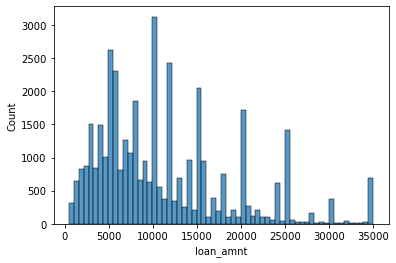

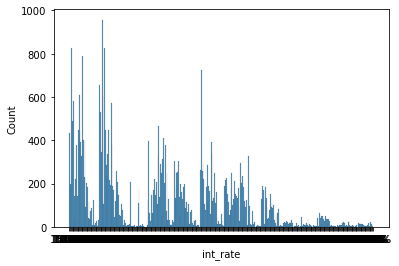

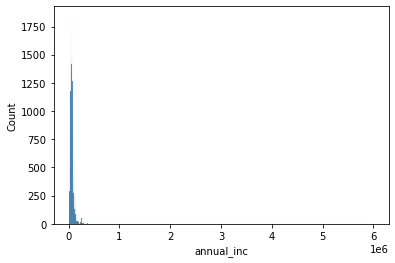

In [26]:
# plot all continuos column
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

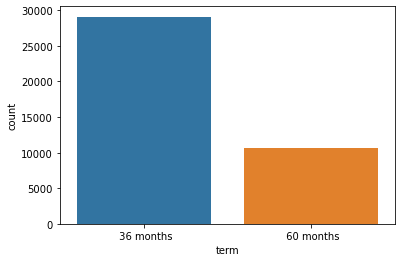

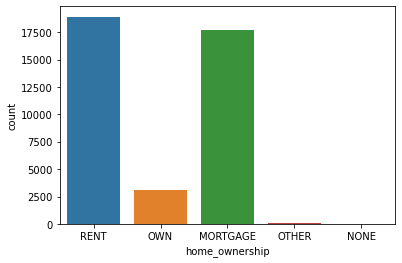

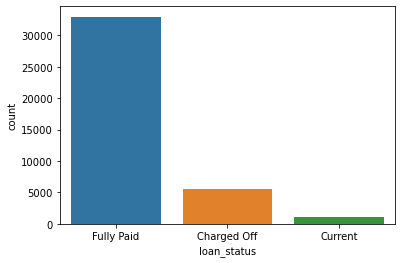

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


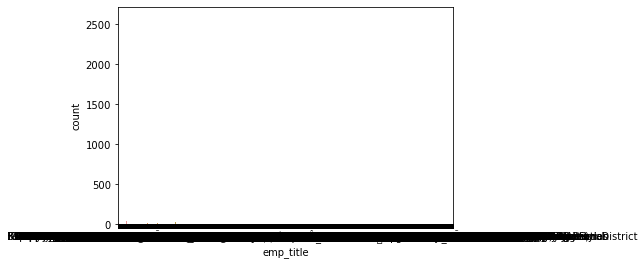

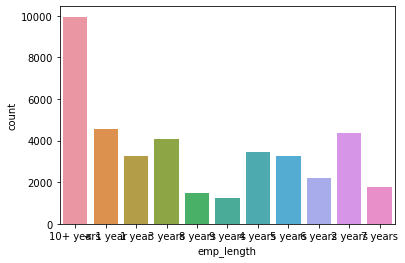

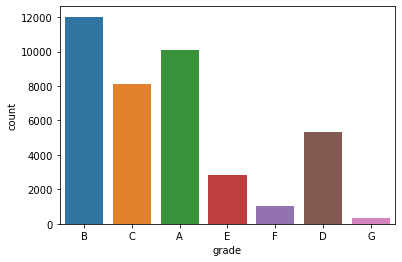

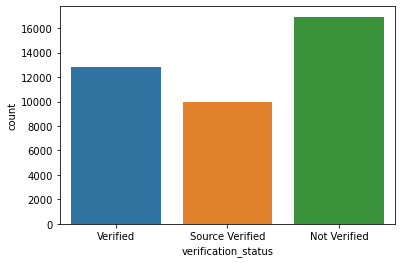

In [27]:

## plot all ccategorical column

for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

#### Bivariate analysis

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

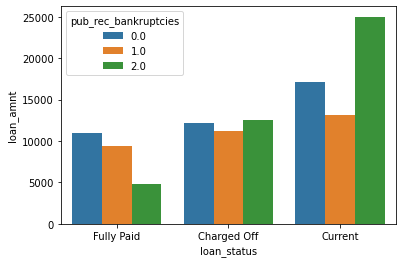

In [32]:
## plot loan status with loan amount and public record bankruptcies
sns.barplot(x=df["loan_status"],y=df["loan_amnt"],hue=df['pub_rec_bankruptcies'],ci=None)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

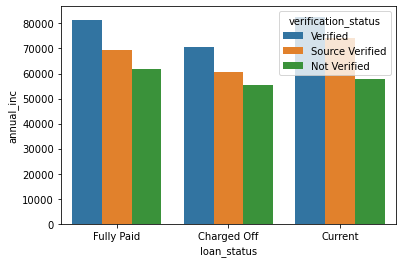

In [33]:
## plot loan status with annual income and verification status
sns.barplot(x=df["loan_status"],y=df["annual_inc"],hue=df['verification_status'],ci=None)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

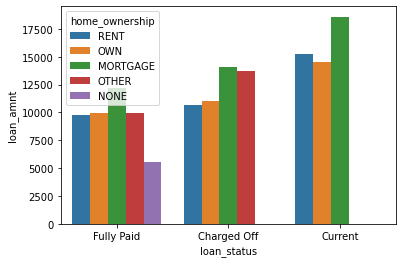

In [37]:
## plot loan status with loan amount and home ownership
sns.barplot(df["loan_status"],y=df["loan_amnt"],hue=df["home_ownership"],ci=None)

#### Multi variate analysis of debt to income ratio, loan amount and loan status

In [35]:
# Grouping the dti column into 4 sub groups
df['debtIncomeRatio_group'] = pd.qcut(df['dti'], q=4, labels=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

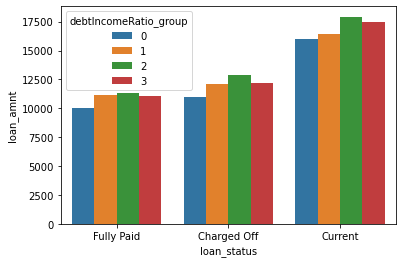

In [36]:
# Plotting graph of loan amount and loan status and varying with debt to income ratio.
sns.barplot(df["loan_status"],y=df["loan_amnt"],hue=df["debtIncomeRatio_group"],ci=None)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


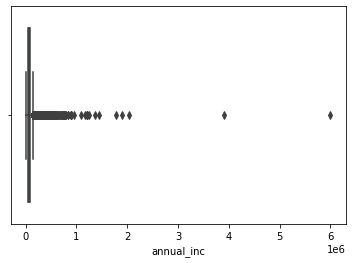

In [150]:
sns.boxplot(df['annual_inc'])
plt.show()

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

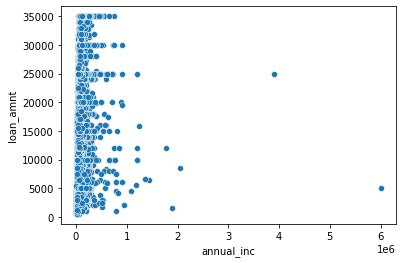

In [132]:
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

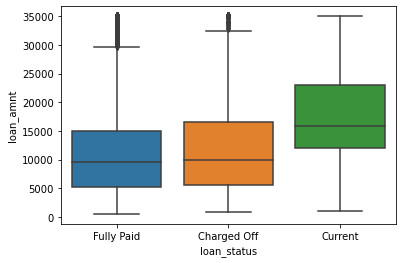

In [136]:
# Box plot of loan status and loan amount
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [30]:
# Box plot of loan status and loan amount
#sns.boxplot(x='loan_status', y='home_ownership', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

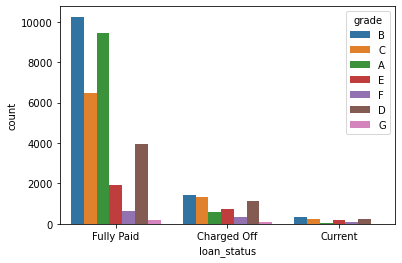

In [31]:
# Plot of loan status and loan amount with loan grade
sns.countplot(x='loan_status', hue='grade', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

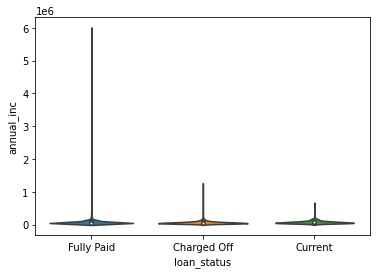

In [138]:
sns.violinplot(x='loan_status', y='annual_inc', data=df)

emp_length   1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
loan_status                                                                   
Charged Off     456       1559      567      555      462      458      307   
Current          71        433       97       83       94       88       61   
Fully Paid     2713       7962     3724     3457     2880     2736     1861   

emp_length   7 years  8 years  9 years  < 1 year  
loan_status                                       
Charged Off      263      203      158       639  
Current           62       44       32        75  
Fully Paid      1448     1232     1068      3869  


<AxesSubplot:xlabel='loan_status'>

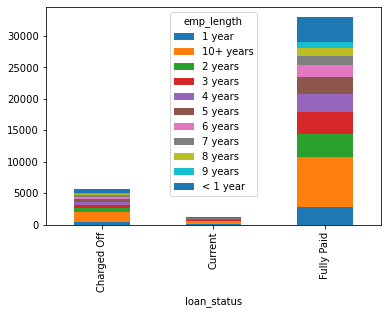

In [139]:
# Create a cross-tabulation table of loan_status and emp_length
crosstab = pd.crosstab(df['loan_status'], df['emp_length'])
print(crosstab)

# Visualize the cross-tabulation using a stacked bar plot
crosstab.plot(kind='bar', stacked=True)

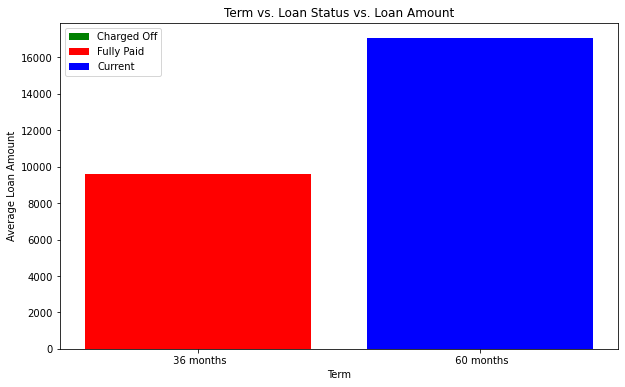

In [142]:
# Group data by 'term' and 'loan_status' and calculate average loan amount
grouped_data = df.groupby(['term', 'loan_status'])['loan_amnt'].mean().reset_index()

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green', 'red', 'blue', 'orange']  # Define colors for different loan_status values

# Iterate over unique loan_status values and plot bar plots for each term
for i, status in enumerate(grouped_data['loan_status'].unique()):
    temp_data = grouped_data[grouped_data['loan_status'] == status]
    ax.bar(temp_data['term'], temp_data['loan_amnt'], color=colors[i], label=status)

ax.set_xlabel('Term')
ax.set_ylabel('Average Loan Amount')
ax.set_title('Term vs. Loan Status vs. Loan Amount')
ax.legend()
plt.show()